In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.75
session = tf.Session(config=config)
with tf.device('/device:GPU:2'):
    import keras
    from keras.models import Sequential
    #from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose,Activation
    from keras.layers.normalization import BatchNormalization
    from keras import backend as K
    import pickle as pk
    batch_size = 1024
    #epochs = 50
    import numpy as  np
    import os
    cwd = os.getcwd()
    #x_train = os.path.join(cwd,'Noisy_TCDTIMIT/Babble/20/volunteers/01M/straightcam')
    #y_train = os.path.join(cwd,'Clean/volunteers/01M/straightcam')

#     pickle_train = open("noiseBabble_xtrain.pickle","rb")
#     x_train = pk.load(pickle_train)
#     pickle_trainlabel = open("cleanBabble.pickle","rb")
#     y_train = pk.load(pickle_trainlabel)

#     print("Got the input data")
#     x_train = np.asarray(x_train[0:100000])
#     y_train = np.asarray(y_train[0:100000])
#     x_train = x_train.reshape(x_train.shape[0], 129, 16, 1)
#     y_train = y_train.reshape(y_train.shape[0], 129, 16, 1)
#     print(np.asarray(x_train).shape)

    model2 = Sequential()
    #model.add(BatchNormalization())
    model2.add(Conv2D(64, kernel_size=(7, 7),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',input_shape=(129,16,1)))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Conv2D(128, (5, 5),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Conv2D(256, (3, 3),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Conv2D(256, (1, 1),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    #model.add(Conv2DTranspose(128, (3, 3), activation='relu',padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Conv2DTranspose(128, (3, 3),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Conv2DTranspose(64, (5, 5),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Conv2DTranspose(1, (7, 7),padding='valid',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    
#     model2.compile(loss=keras.losses.mean_squared_error,
#                   optimizer=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999),
#                   metrics=['accuracy'])
#     #model.build()

#     print(model.summary())
#     model.fit(np.asarray(x_train), np.asarray(y_train),
#               batch_size=batch_size,
#               epochs=epochs,
#               validation_split = 0.01
#              )

#     model.save_weights('weights_2.h5')

    #score = model.evaluate(x_train, y_train, verbose=0)

    #print('Test loss:', score[0])
    #print('Test accuracy:', score[1])
    model2.load_weights('weights_2.h5')

Using TensorFlow backend.


In [1]:
from keras.models import load_model
new_model = load_model('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/code/babble/model_babble_20db.h5')

Using TensorFlow backend.


In [3]:
import os
from scipy import signal
from scipy.io import wavfile
import numpy as np
sample_rate, samples = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/Noisy_TCDTIMIT/Babble/20/lipspeakers/Lipspkr2/straightcam/si1035.wav')
print(sample_rate)
print(len(samples))
print(samples.shape)
#samples = samples.reshape(samples.shape[0])
#samples = samples[:,1]
print((samples).shape)
NoiseBabble= []
Phase = []
f, t, Zxx = signal.stft(samples, sample_rate,nperseg=256,nfft=256)
print("Z",Zxx.shape)
phase = np.angle(Zxx)
T = len(t)//16
print("T",T)
for i in range(0,(T)*16,16):
  NoiseBabble.append(np.log(np.abs(Zxx[:,i:i+16])+1e-8))
  Phase.append(phase[:,i:i+16])
print("N",np.asarray(NoiseBabble).shape)
if len(t) % 16 !=0:
  NoiseBabble.append(np.log(np.abs(Zxx[:,len(t)-16:len(t)])+1e-8))
  Phase.append(phase[:,len(t)-16:len(t)])
  T = T+1
NoiseBabble = np.asarray(NoiseBabble)
print("S",NoiseBabble.shape)
NoiseBabble = NoiseBabble.reshape(NoiseBabble.shape[0], 129, 16, 1)
b = np.asarray(NoiseBabble)
rectified = new_model.predict(b)
rectified =rectified.reshape(rectified.shape[0], 129, 16)
A = np.zeros((129,0))
for i in range(T):
  S = np.exp(rectified[i])
  A = np.append(A,S*np.cos(Phase[i]) + 1j * S*np.sin(Phase[i]),axis=1)
t,x = signal.istft(A,nperseg=256,nfft=256)
x = np.asarray(x, dtype=np.int16)
print(len(x))
#data=np.int16(x/np.max(np.abs(x)) * 32767)
wavfile.write('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/code/babble/testing/si1035.wav', 16000, x)

16000
85333
(85333,)
(85333,)
Z (129, 668)
T 41
N (41, 129, 16)
S (42, 129, 16)
85888


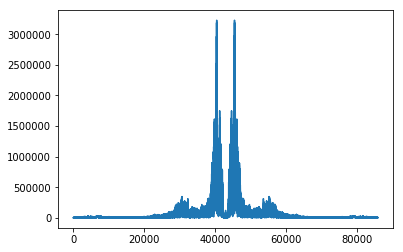

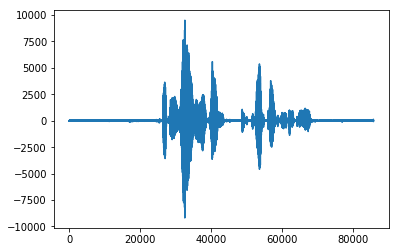

In [5]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
import numpy as np
fs, data = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/code/babble/testing/si1035.wav')
fft_out = (fft(data))
FFT = np.fft.fftshift(fft_out)
plt.plot(np.arange(0,data.shape[0]), np.abs(FFT))
plt.show()
plt.plot(np.arange(0,data.shape[0]),data)
plt.show()

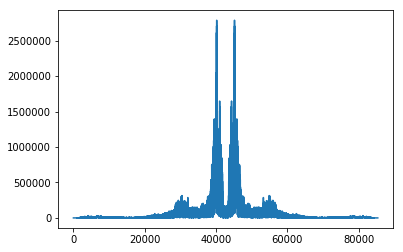

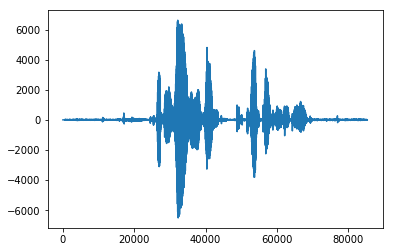

In [6]:
fs, data = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/Clean/lipspeakers/Lipspkr2/straightcam/si1035.wav')
fft_out = np.fft.fftshift(fft(data))
plt.plot(np.arange(0,data.shape[0]), np.abs(fft_out))
plt.show()
plt.plot(np.arange(0,data.shape[0]),data)
plt.show()

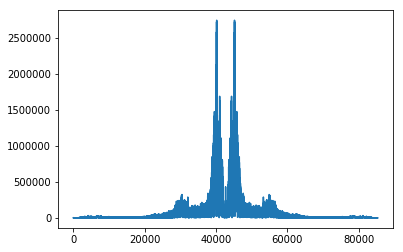

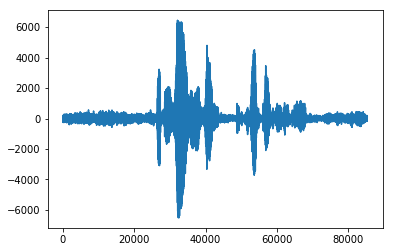

In [7]:

fs, data = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/TCDTIMIT/Noisy_TCDTIMIT/Babble/20/lipspeakers/Lipspkr2/straightcam/si1035.wav')
fft_out = np.fft.fftshift(fft(data))
plt.plot(np.arange(0,data.shape[0]), np.abs(fft_out))
plt.show()
plt.plot(np.arange(0,data.shape[0]),data)
plt.show()

In [ ]:
16000
13349376
Z (349, 129, 3)
T 0
N (0,)
S (1, 349, 0, 3)

In [25]:
13349376*2

26698752

In [12]:
47*129*16

94944

In [5]:
129*16

2064

In [6]:
2064/16000

0.129

In [14]:
129*740

95460

In [15]:
94549/256

369.33203125

In [17]:
94549%128

85

In [14]:
import pywt
#pywt.families()

In [13]:
#wavelet = pywt.Wavelet('/media/hd2/chaitanya/Deep_Learning/project/anotherdataset/noisy_testset_wav/p232_023.wav','haar')

In [12]:
sample_rate, samples = wavfile.read('/media/hd2/chaitanya/Deep_Learning/project/anotherdataset/noisy_testset_wav/p232_023.wav')

#a,d = pywt.wavelist(samples,'haar')